# A Community and the Ocean-

## The Data Story inside John Steinbeck's *Cannery Row*

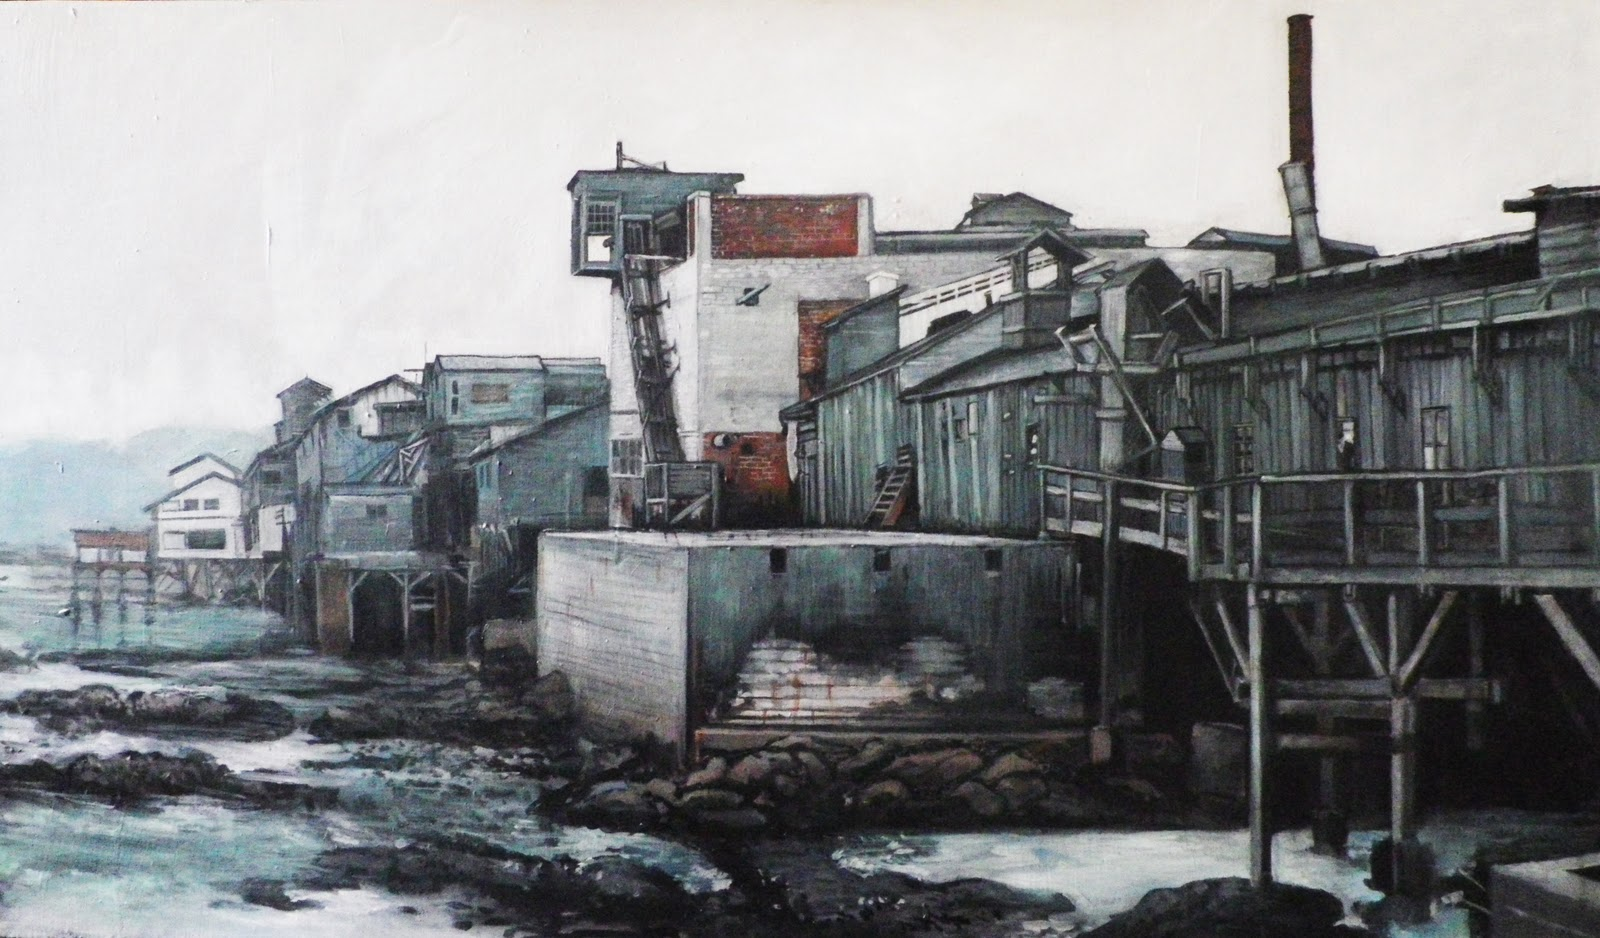

## The Collapse of the Sardine Fishery in Monterrey California
By the mid-1940s, sardine fishing in Monterrey bay was a booming industry. However, the fishery experienced a sudden collapse in the early 1950s. Cannery Row is a story that showcases the industry and community immediately before this collapse. Using a few different datasets, investigate the patterns of the collapse and later recovery, as well as an environmental factor that may be related. Using this story as a way to understand the connection between economics, human connections, and the natural environment, use Monterrey fish landing data to understand the history of sardine fishing in Southern Califorina.

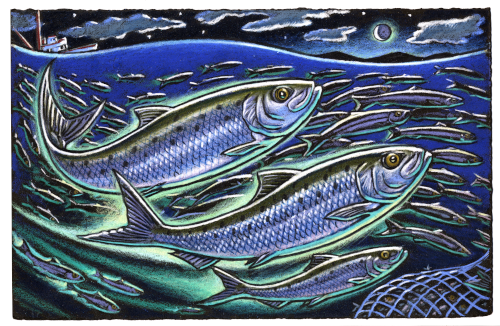

In [9]:
#### Prep Code

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

os.chdir("E:/DataStories")

temp = pd.read_csv("_data/scripps_temps_stage.csv")
temp.info()

ueber = pd.read_csv("_data/ueber_landings_stage.csv")
ueber.info()

noaa = pd.read_csv("_data/noaa_master_stage.csv")
noaa.info()

ModuleNotFoundError: No module named 'pandas'

Text(0.5, 1.0, 'Sardines Harvested in Monterrey')

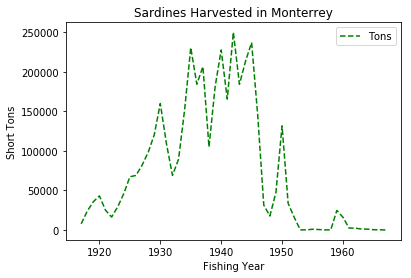

In [12]:
#### Create line graph of two continuous variables with Matplotlib

xu = ueber["Year"]
yu = ueber["Tons"]
plt.plot(xu, yu, 'g--')
plt.ylabel("Short Tons")
plt.xlabel("Fishing Year")
plt.legend()
plt.title("Sardines Harvested in Monterrey")

#### Discussion Questions:
1. How does the data portrayed in the graph relate to the story?
2. Based on Steinbecks portrayal of Cannery Row in 1945, what do you think may have led to the collapse? 

## Water Temperature Data from La Jolla Pier

Before and after the the collapse, the sardine fishery fluctuated by year. While some of this may be due to chance, environmental factors may be related to size of the Sardine population. Based on established research, there exists a relationship in the size of the population fished in different spots in Califronia and the temperature in those regions. Read the text below to hear how Sardine populations migrate and what Sardine fishing was like in the post recovery period. 

[Sardine Population and Temperature](_doc/sardine_abundance)

Using the dataset taken from researchers at UC Santa Barbara that records the water temperature at the surf and bottom of La Jolla Pier in Monterrey, combine with landings to determine the effect of temperature on landings. 

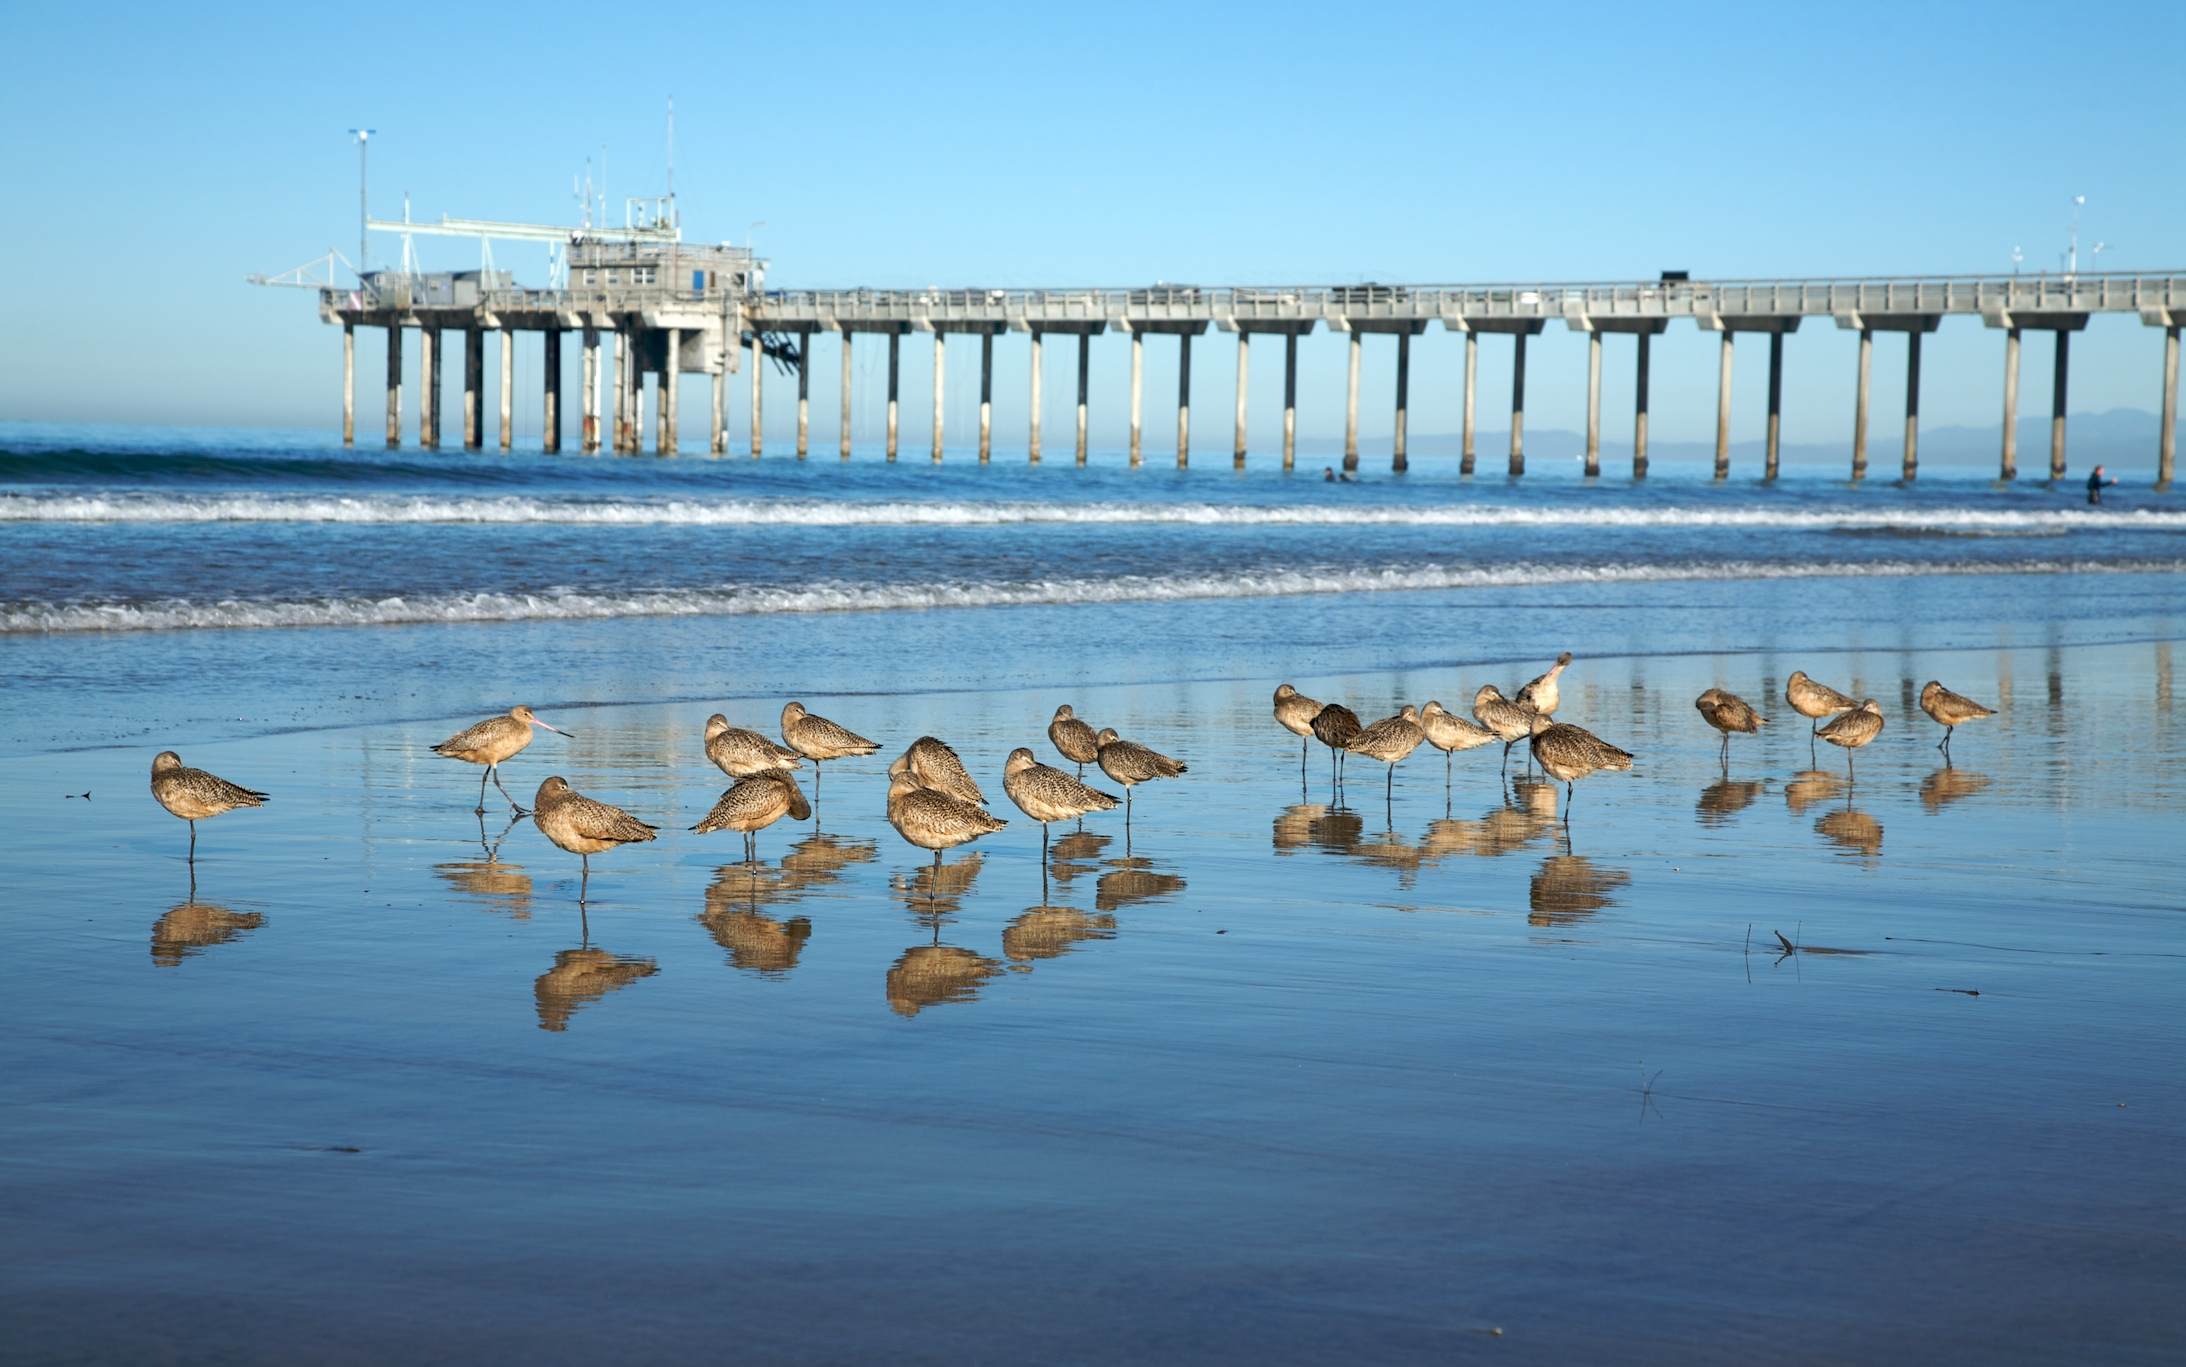

In [13]:
#### Group data by column and average

gtemp = temp.groupby(["Year", "Month", "Day"]).mean()
gsurf = gtemp.groupby("Year")["Surf"].mean() 
gbott = gtemp.groupby("Year")["Bottom"].mean() 

In [14]:
#### Convert series to frame, rest index, and combine back together

dsurf = gsurf.to_frame()
dbott = gbott.to_frame()

isurf = dsurf.reset_index(level=["Year"])
ibott = dbott.reset_index(level=["Year"])

ibott["Surf"] = isurf["Surf"]
tm = ibott

Text(0.5, 1.0, 'Bottom Temperature at La Jolla Pier')

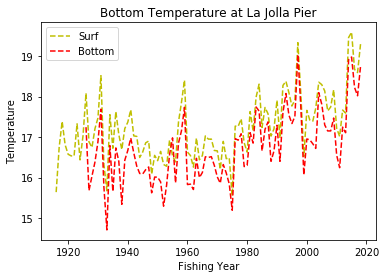

In [15]:
#### Create line graph with multiple variables with Matplotlib

xtm = tm["Year"]
ytms = tm["Surf"]
plt.plot(xtm, ytms, 'y--')
plt.ylabel("Temperature")
plt.xlabel("Fishing Year")
plt.legend()
plt.title("Surf Temperature at La Jolla Pier")

ytmb = tm["Bottom"]
plt.plot(xtm, ytmb, 'r--')
plt.ylabel("Temperature")
plt.xlabel("Fishing Year")
plt.legend()
plt.title("Bottom Temperature at La Jolla Pier")

In [19]:
#### Subset by date

tm65 = tm[tm.Year < 1965]

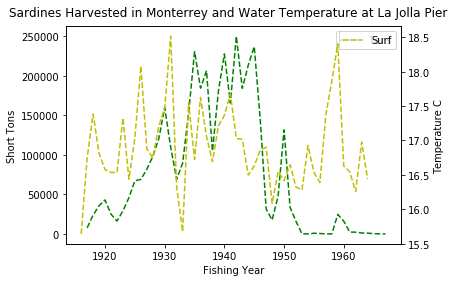

In [22]:
#### Create line graph with multiple Y axis and same X axis with Matplotlib

fig, ax1 = plt.subplots()

xu = ueber["Year"]
yu = ueber["Tons"]
plt.plot(xu, yu, 'g--')
plt.ylabel("Short Tons")
plt.xlabel("Fishing Year")
plt.legend()

ax2 = ax1.twinx()

xta = tm65["Year"]
ysa = tm65["Surf"]
ax2.plot(xta, ysa, "y--")
ax2.set_ylabel("Temperature C")
ax2.legend()

fig.suptitle("Sardines Harvested in Monterrey and Water Temperature at La Jolla Pier", y = 0.95, fontsize = 12)
fig.savefig("_fig/fish_plot_uebertemp.jpeg")

#### Discussion Questions:
1. How does the data portrayed in the graph relate to the story?
2. What kind of relationship do we think may be happening with the Sardine population? 
3. In order to investigate this relationship, what would we need to do next?

### Statistical Assessment of Pre-Collapse Years
The years 1927 to 1945 witnessed a fully developed fishing industry as well as a not yet depleted sardine poluation. Use this time period to analyze the relationship of temperature and landings. 

In [ ]:
#### Create scatter plot for two continuous variables

In [23]:
#### Perform linear regression on two continuous variables with Scipy

tm45 = tm[tm.Year < 1945]
tm2745 = tm45[tm45.Year > 1927]

ueber45 = ueber[ueber.Year < 1945]
ueber2745 = ueber45[ueber45.Year > 1927]

x2745 = np.array(tm2745["Year"]).reshape((-1, 1))
y2745 = np.array(ueber2745["Tons"]).reshape((-1, 1))


model.fit(x2745, y2745)
r2745 = model.score(x2745, y2745)
print("Rsq Pre Collapse Data = ", r2745)

Rsq Pre Collapse Data =  0.448382612149383


#### Discussion Questions
1. What does the Rsq value tell us about the relationship?
2. How would you use this information for managing the fishery int he future?


## California Fishing Data from NOAA after 1950

After the collapse, Sardine fishing was prohibited in the Pacific for an extended time. However, Sardine fishing did resume at smaller levels. Using the NOAA dataset that includes landings for all species in all 50 states since 1950, invesitgate the trends in Sardines in California.

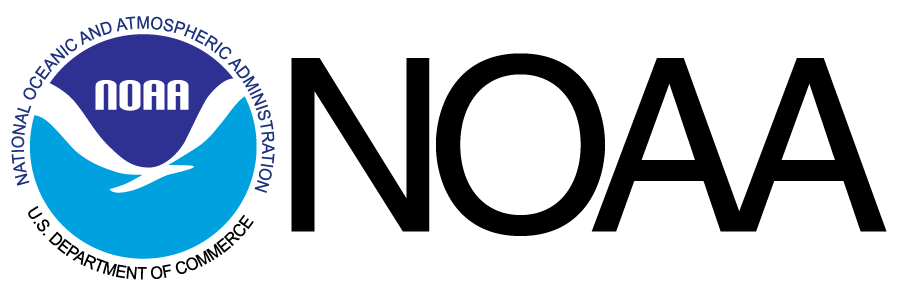

In [24]:
#### Group by column values and sum

gnoaa = noaa.groupby(["Year", "State", "Species"], as_index = False).sum()
dnoaa = gnoaa.drop(["Dollars", "Pounds"], axis=1)

In [2]:
#### Filter by column value

snoaa = dnoaa[dnoaa.Species == "SARDINE, PACIFIC"]
ca = snoaa[snoaa.State == "California"]

NameError: name 'dnoaa' is not defined

In [3]:
#### Create line plot with two continuous variables with Matplotlib

xca = ca["Year"]
yca = ca["Tons"]
plt.plot(xca, yca, 'b--')
plt.ylabel("Tons")
plt.xlabel("Fishing Year")
plt.legend()
plt.title("Sardines Harvested in California")
plt.show()

NameError: name 'ca' is not defined

In [27]:
#### Subset by year

ca = ca[ca.Year > 1951] 

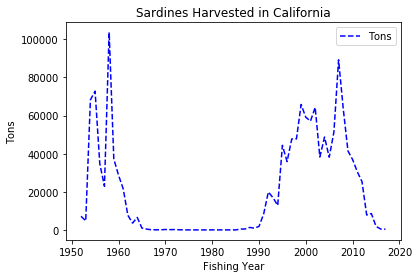

In [28]:
#### Create line plot with two continuous variables with Matplotlib

xca = ca["Year"]
yca = ca["Tons"]
plt.plot(xca, yca, 'b--')
plt.ylabel("Tons")
plt.xlabel("Fishing Year")
plt.legend()
plt.title("Sardines Harvested in California")
plt.show()

In [29]:
#### Subset by year

tm51 = tm[tm.Year > 1950] 

In [4]:
#### Create line graph with multiple variables with Matplotlib

fig, ax1 = plt.subplots()

xca = ca["Year"]
yca = ca["Tons"]
ax1.plot(xca, yca, color = "blue")
ax1.set_ylabel("Tons")
ax1.set_xlabel("Fishing Year")
plt.legend()

ax2 = ax1.twinx()

xtm51 = tm51["Year"]
ytms51 = tm51["Surf"]
ax2.plot(xtm51, ytms51, "orange")
ax2.set_ylabel("Temperature C")

ytmb51 = tm51["Bottom"]
plt.plot(xtm51, ytmb51, "red")

plt.legend()
fig.suptitle("Sardines Harvested and Water Temperature in California", y = 0.95, fontsize = 12)

NameError: name 'plt' is not defined

#### Discussion Questions:
1. When comparing the ueber data with the noaa data alongside temperature, what do you notice?
2. What periods of time do you think would be relevant to study more closely?

### Post Recovery Data Analysis In California

After 1985, the Sardine fishery was reopened for commerical fishing. Select all the data after 1985 and plot. 

Text(0.5, 0.95, 'Sardines Harvested and Water Temperature in California')

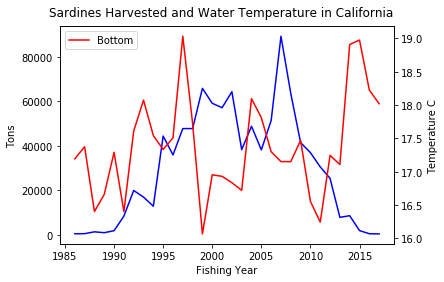

In [31]:
#### Create line graph with multiple Y axis and same X axis with Matplotlib

fig, ax1 = plt.subplots()

ca85 = ca[ca.Year > 1985]
xca85 = ca85["Year"]
yca85 = ca85["Tons"]
ax1.plot(xca85, yca85, color = "blue")
ax1.set_ylabel("Tons")
ax1.set_xlabel("Fishing Year")

ax2 = ax1.twinx()

tm85 = tm[tm.Year > 1985]
tm85 = tm85[tm85.Year < 2018]
xtm85 = tm85["Year"]
ytm85 = tm85["Bottom"]
ax2.plot(xtm85, ytm85, "red")
ax2.set_ylabel("Temperature C")

plt.legend()
fig.suptitle("Sardines Harvested and Water Temperature in California", y = 0.95, fontsize = 12)

In [ ]:
#### Create scatter plot for two continuous variables

In [32]:
#### Perform linear regression on two continuous variables with Scipy

model = LinearRegression()

x85 = np.array(tm85["Bottom"]).reshape((-1, 1))
y85 = np.array(ca85["Tons"]).reshape((-1, 1))

model.fit(x85, y85)
r85 = model.score(x85, y85)
print("Rsq of Post Recovery State Data = ", r85)

Rsq of Post Recovery State Data =  0.04356038294606568


#### Discussion Questions
1. Based on the Rsq, is this relationship signifcant?
2. Based on what you see visually in the plot, is there a different way to asses the relationship that may be more accurate?

### Phase Post-Recovery Data by 10 Years and Check Fit
Based on the visual representation, the data appears to be related to previosu years temperature reading. Phase the data by 10 years and evaluate whether it is n accurate predictor. 

In [ ]:
#### Create new column based on function

phs10 = tm["Year"] + 10
tm["Phase10"] = phs10

In [ ]:
#### Subset by Year

tm10 = tm[tm.Phase10 < 2010]
tm8510 = tm10[tm10.Phase10 > 1985]

ca10 = ca85[ca85.Year < 2010]
ca8510 = ca10[ca10.Year > 1985]

In [ ]:
#### Create scatter plot for two continuous variables

x = np.array(tm8510["Phase10"]).reshape((-1, 1))
y = np.array(ca8510["Tons"]).reshape((-1, 1))

plt.scatter(x, y)
plt.legend()
fig.suptitle("Sardines Harvest and Water Temperature in California", y = 0.95, fontsize = 12)

In [33]:
#### Perform linear regression on two continuous variables with Scipy

x = np.array(tm8510["Phase10"]).reshape((-1, 1))
y = np.array(ca8510["Tons"]).reshape((-1, 1))

r = spearmanr(x, y)

Rsq 1985 to 2010 with 10 year lag =  0.6989541586588507


#### Discussion Questions
1. Based on the Rsq, is this relationship signifcant?
2. Why would the temperature from ten years prior be a predictor in the Pos-Recovery period?
3. How would this finding dictate the way you would manage a fishery locally and/or for a state?

## How data can help us manage a fishery

#### Pre-Collapse Data

When the older data is assessed, agressive fishing began in 1926 and ended in 1945. When the temperatures are evaluated, there appears to be some assoication between bottom temperature and landings in Monterrey. This indicates that temperature readings could have helped provide information to prevent overfishing and depletion of the population. 

#### Post-Collapse Data

Sardines experienced a significant drop before 1965 and was left unfished for decades. In the mid 1980s, the fishery was recovered enough to resume fishing but was not as plentiful as before. While a direct linear regression was not significant, phasing the data by 10 years showed a strong association. This indicates that temperature trends can have long term impacts as the Sardine population migrates along the Pacific coast. Coordinating local fishing limits based on temperature readings accurately could help mitigate a second depletion from occuring.

#### Discussion
1. Focusing on Doc's character in the novel, how does he view the natural world differently than the canning industry around him?
2. The community of people living in Cannery Row respect and value Doc. What do they value in his character? 
3. How does Doc and community represent a foil to the canning industry?
4. What values in the community relate to the management of a fishery from a state and local level?
5. What other reflections do you have on fishery management do you have from the data and the novel?

> “Doc would listen to any kind of nonsense and change it for you to a kind of wisdom.”
>
> ― Cannery Row

## Eastern Oysters in Florida

Using the NOAA dataset, isolate the Eastern Oyster landings in Florida and graph the results over time. Use the data to discuss the similarities and differences with Sardines in California. 

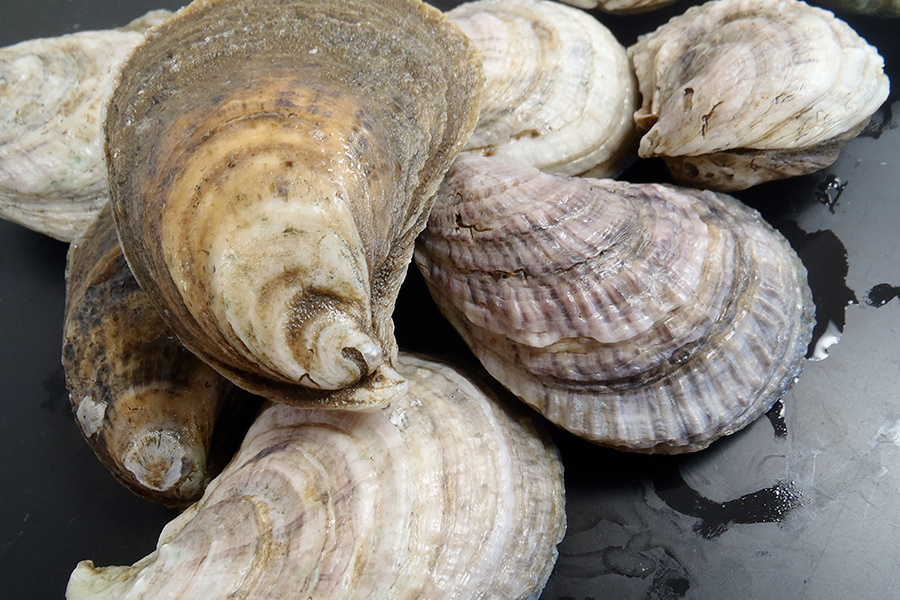

#### [Answer](#answer_key)
******
******
******
******
******
******
******
******
******
******
******
******
******
******
### <a id='answer_key'> Answer </a>

In [5]:
#### Prep code

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

os.chdir("E:/DataStories")

noaa = pd.read_csv("_data/noaa_master_stage.csv", encoding = "ISO-8859-1")
noaa.info()

ModuleNotFoundError: No module named 'pandas'

In [2]:
#### Subset dataset by string value in column

oyst = noaa[noaa.Species == "OYSTER, EASTERN"]
oyst.info()

fl = oyst[oyst.State == "Florida"]
fl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3050 entries, 27 to 108481
Data columns (total 6 columns):
Year       3050 non-null float64
State      3050 non-null object
Species    3050 non-null object
Pounds     3050 non-null float64
Tons       3050 non-null float64
Dollars    3050 non-null float64
dtypes: float64(4), object(2)
memory usage: 166.8+ KB


In [10]:
#### Group by column values and sum

floy = fl.groupby(["Year"], as_index = False).sum()
floy = floy.drop(["Pounds"], axis=1)
floy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69 entries, 0 to 68
Data columns (total 3 columns):
Year       69 non-null float64
Tons       69 non-null float64
Dollars    69 non-null float64
dtypes: float64(3)
memory usage: 2.2 KB


In [1]:
#### Create line graph with multiple Y axis and same X axis with matplotlib

fig, ax1 = plt.subplots()

ax1.plot(floy.Year, floy.Tons, color = "blue")
ax1.set_ylabel("Tons")

ax2 = ax1.twinx()

ax2.plot(floy.Year, floy.Dollars, color = "green")
ax2.set_ylabel("$ (Millions)")

plt.xlabel("Year")
plt.legend("Tons", "Dollars")
plt.title("Eastern Oyster Landings in Florida")

NameError: name 'plt' is not defined